In [28]:
#format the book
%matplotlib inline
from __future__ import division, print_function
from book_format import load_style
load_style()

import numpy as np



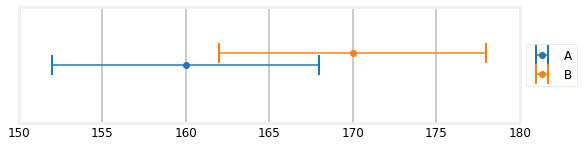

In [15]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars

"""
Scale A and Scale B have the same expected inaccuracy - with a spread of +- 8 lbs.

The result from A tells us to expect a weight between 152 and 168

The result from B tells us to expect a weight between 162 and 178

The overlapping region is 162-168.
"""


plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))



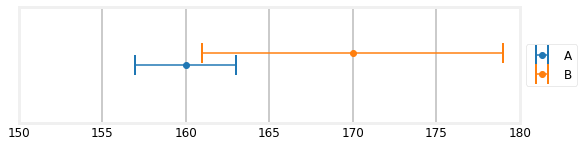

In [12]:
"""
As the accuracy of one sensor (scale) gets higher, the overlapping region gets smaller
"""

plot_errorbars([(160,3,'A'),(170,9,'B')], xlims = (150,180))

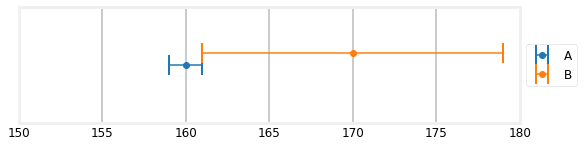

In [13]:
"""
Until the only 
"""

plot_errorbars([(160,1,'A'), (170,9, 'B')], xlims = (150,180))

In [29]:
"""
What if I weighed myself 10000 times with the same scale?
"""

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

measurements = np.random.uniform(160,170, 10000)
mean = np.mean(measurements)



print('Average of measurements is {:.4f}'.format(mean))


# This scale makes one impossible assumption: That it is as likely to get a measurement from ..

Average of measurements is 165.0530


Average of measurements is 164.9842


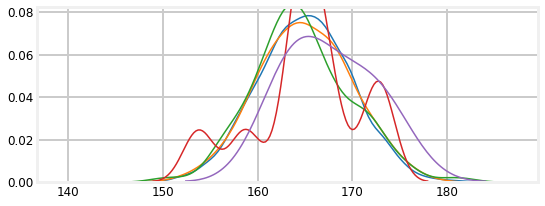

In [39]:
measurements0 = np.random.normal(165, 5, size = 10000)
measurements1 = np.random.normal(165, 5, size = 1000)
measurements2 = np.random.normal(165, 5, size = 100)
measurements3 = np.random.normal(165, 5, size = 10)
measurements4 = np.random.normal(165, 5, size = 5)

field = [measurements0, measurements1, measurements2, measurements3, measurements4]

mean = np.mean(measurements)

print('Average of measurements is {:.4f}'.format(mean))

for i in range(len(field)):
    sns.kdeplot(field[i])


# Problem - weighing 10 000 times

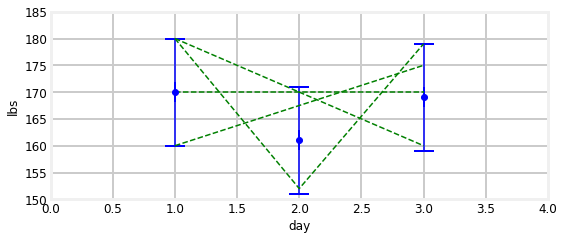

In [40]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

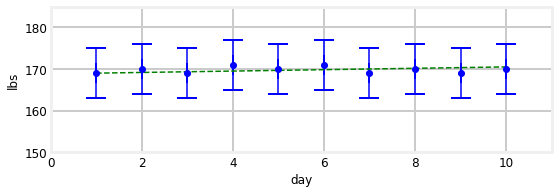

In [41]:
gh.plot_hypothesis2()

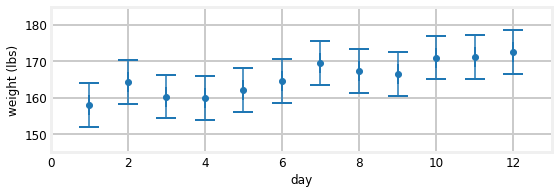

In [42]:
gh.plot_hypothesis3()


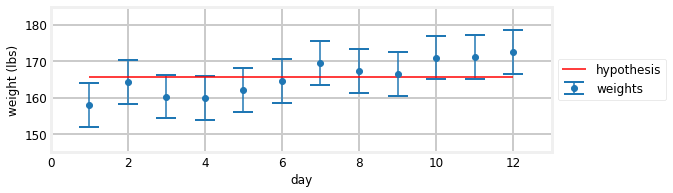

In [43]:
gh.plot_hypothesis4()

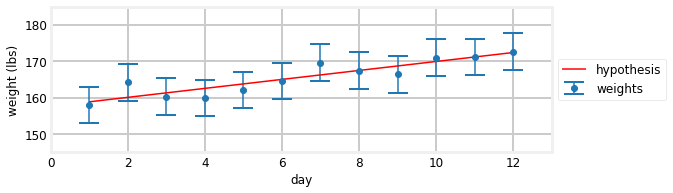

In [44]:
gh.plot_hypothesis5()

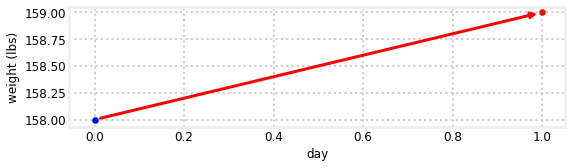

In [45]:
gh.plot_estimate_chart_1()

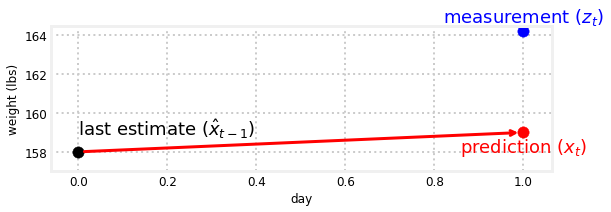

In [46]:
"""
The prediction (xt) is quite different from the measurement (zt).

But that's fine.

If the measurement were the same as the prediction, the measurement would not be adding any information to the
filter.

KEY INSIGHT:
-----------

We have to blend the prediction and the measurement in some way.
"""

gh.plot_estimate_chart_2()

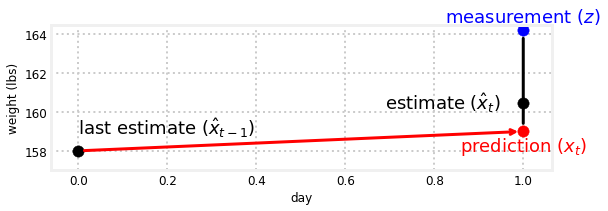

In [47]:
gh.plot_estimate_chart_3()

In [50]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(weight, gain_rate, do_print=False):     
    # store the filtered results
    estimates, predictions = [weight], []

     # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        prediction = weight + gain_rate * time_step

        # update filter 
        weight = prediction + scale_factor * (z - prediction)

        # save
        estimates.append(weight)
        predictions.append(prediction)
        if do_print:
            gh.print_results(estimates, prediction, weight)

    return estimates, predictions

initial_guess = 160.

estimates, predictions = predict_using_gain_guess(
    weight=initial_guess, gain_rate=1, do_print=True)     



previous: 160.00, prediction: 161.00 estimate 159.80
previous: 159.80, prediction: 160.80 estimate 162.16
previous: 162.16, prediction: 163.16 estimate 162.02
previous: 162.02, prediction: 163.02 estimate 161.77
previous: 161.77, prediction: 162.77 estimate 162.50
previous: 162.50, prediction: 163.50 estimate 163.94
previous: 163.94, prediction: 164.94 estimate 166.80
previous: 166.80, prediction: 167.80 estimate 167.64
previous: 167.64, prediction: 168.64 estimate 167.75
previous: 167.75, prediction: 168.75 estimate 169.65
previous: 169.65, prediction: 170.65 estimate 170.87
previous: 170.87, prediction: 171.87 estimate 172.16


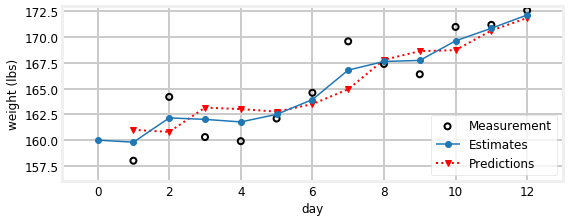

In [51]:
# Plot
gh.plot_gh_results(weights, estimates, predictions)

previous: 160.00, prediction: 159.00 estimate 158.60
previous: 158.60, prediction: 157.60 estimate 160.24
previous: 160.24, prediction: 159.24 estimate 159.66
previous: 159.66, prediction: 158.66 estimate 159.16
previous: 159.16, prediction: 158.16 estimate 159.74
previous: 159.74, prediction: 158.74 estimate 161.08
previous: 161.08, prediction: 160.08 estimate 163.89
previous: 163.89, prediction: 162.89 estimate 164.69
previous: 164.69, prediction: 163.69 estimate 164.78
previous: 164.78, prediction: 163.78 estimate 166.67
previous: 166.67, prediction: 165.67 estimate 167.88
previous: 167.88, prediction: 166.88 estimate 169.17


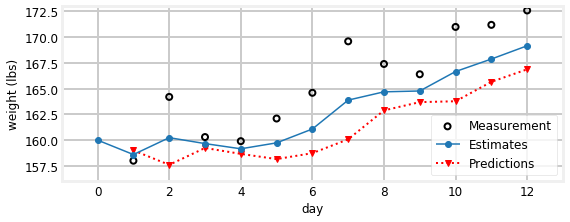

In [52]:
e, p = predict_using_gain_guess(initial_guess, -1., do_print= True)
gh.plot_gh_results(weights, e, p)

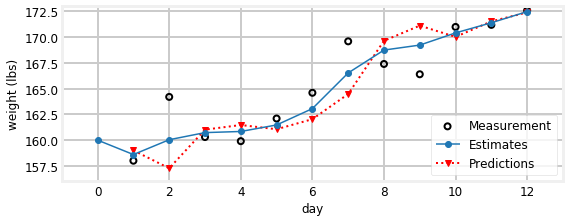

In [53]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)

gh.plot_gh_results(weights, estimates, predictions)